<a href="https://colab.research.google.com/github/ShakedZrihen/worldwide-song-hit-formula/blob/predictions/prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict if song can be a hit

## Imports and mount dataset

In [1]:
## General
from google.colab import drive
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import io
import graphviz
from pydotplus import graph_from_dot_data
from imageio import imread

## ML Algorithms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier



In [2]:
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


## Load data set

In [3]:
charts_data_df = pd.read_csv('/content/gdrive/MyDrive/OpenUniversity/DS/finalDataset/chartsData.csv')

In [4]:
charts_data_df.head(10)

,Unnamed: 0,Artist,Position,Streams,Track Name,URL,country,dates
0,0,Red Velvet,1,205528,Psycho,https://open.spotify.com/track/3CYH422oy1cZNoo...,Viet Nam,2019-12-27--2020-01-03
1,1,Red Velvet,106,314994,Psycho,https://open.spotify.com/track/3CYH422oy1cZNoo...,Indonesia,2020-11-13--2020-11-20
2,2,Red Velvet,107,79162,Psycho,https://open.spotify.com/track/3CYH422oy1cZNoo...,Thailand,2020-11-20--2020-11-27
3,3,Red Velvet,82,64279,Psycho,https://open.spotify.com/track/3CYH422oy1cZNoo...,Singapore,2020-07-31--2020-08-07
4,4,Red Velvet,91,367569,Psycho,https://open.spotify.com/track/3CYH422oy1cZNoo...,Indonesia,2020-10-09--2020-10-16
5,5,Red Velvet,138,22725,Psycho,https://open.spotify.com/track/3CYH422oy1cZNoo...,Hong Kong,2020-07-10--2020-07-17
6,6,Red Velvet,131,102957,Psycho,https://open.spotify.com/track/3CYH422oy1cZNoo...,Japan,2019-12-27--2020-01-03
7,7,Red Velvet,125,6432,Psycho,https://open.spotify.com/track/3CYH422oy1cZNoo...,United Arab Emirates,2020-01-03--2020-01-10
8,8,Red Velvet,28,141716,Psycho,https://open.spotify.com/track/3CYH422oy1cZNoo...,Malaysia,2020-03-20--2020-03-27
9,9,Red Velvet,5,98150,Psycho,https://open.spotify.com/track/3CYH422oy1cZNoo...,Viet Nam,2020-01-31--2020-02-07


## Get all top 10 songs

In [5]:
top_10_songs_df = charts_data_df[charts_data_df.Position <= 30]
print(f'Top 10 songs (with duplications): {len(top_10_songs_df)}')

# Top 10 songs (without duplications)
top_10_songs_uniqu_df = top_10_songs_df['URL'].unique()
print(f'Top 10 songs (without duplications): {len(top_10_songs_uniqu_df)}')

Top 10 songs (with duplications): 322380
Top 10 songs (without duplications): 14898


In [6]:
# Get most popular songs in top 10 charts
top_10_songs_dup_df = top_10_songs_df.pivot_table(columns=['Track Name', 'Artist'], aggfunc='size').sort_values(ascending=False)
top_10_songs_dup_df.head(10)

Track Name                                     Artist       
Blinding Lights                                The Weeknd       3175
Dance Monkey                                   Tones And I      2414
Someone You Loved                              Lewis Capaldi    1988
bad guy                                        Billie Eilish    1893
Señorita                                       Shawn Mendes     1868
Don't Start Now                                Dua Lipa         1615
Roses - Imanbek Remix                          SAINt JHN        1440
Sunflower - Spider-Man: Into the Spider-Verse  Post Malone      1430
Shallow                                        Lady Gaga        1242
Happier                                        Marshmello       1207
dtype: int64

In [7]:
# Get most popular artist
top_10_songs_dup_df = top_10_songs_df.pivot_table(columns=['Artist'], aggfunc='size').sort_values(ascending=False)
top_10_songs_dup_df.head(10)

Artist
Bad Bunny        7560
Post Malone      6648
Ariana Grande    6047
Billie Eilish    5636
The Weeknd       5153
J Balvin         4309
Drake            4052
Dua Lipa         4052
Ozuna            3993
Anuel AA         3288
dtype: int64

## Prepare our dataset for build our models

### Descibe our models

In [8]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(min_samples_split=1000),
    "Support Vector Machine (RBF Kernel)": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}


### Final data tunning

In [9]:
# Add target column
set_unique = set(top_10_songs_uniqu_df)
charts_data_df['target'] = charts_data_df.apply(lambda row: 1 if row.URL in set_unique else 0, axis=1)


In [10]:
charts_data_df['id'] = charts_data_df.apply(lambda row: row.URL.rsplit('/', 1)[-1], axis=1) 
charts_data_df.sample(10)

,Unnamed: 0,Artist,Position,Streams,Track Name,URL,country,dates,target,id
1740653,1740653,Naps,41,11558,6.3,https://open.spotify.com/track/6bzxAa3VCiIGzhj...,Morocco,2020-02-28--2020-03-06,1,6bzxAa3VCiIGzhjsxbHo5q
763293,763293,Los Enanitos Verdes,139,9374,Lamento Boliviano,https://open.spotify.com/track/6Pur3hWy6Nzc27i...,El Salvador,2019-03-15--2019-03-22,0,6Pur3hWy6Nzc27ilmsp5HA
1167395,1167395,Selena Gomez,165,52468,Wolves,https://open.spotify.com/track/7EmGUiUaOSGDnUU...,Peru,2018-05-04--2018-05-11,1,7EmGUiUaOSGDnUUQUDrOXC
621844,621844,Imagine Dragons,110,5252,Thunder,https://open.spotify.com/track/1zB4vmk8tFRmM9U...,Estonia,2018-11-09--2018-11-16,1,1zB4vmk8tFRmM9UULNzbLB
982523,982523,twocolors,65,932181,Lovefool,https://open.spotify.com/track/51Of5p3lKZeOg6i...,Germany,2020-11-27--2020-12-04,1,51Of5p3lKZeOg6itfs4og4
67300,67300,Maroon 5,51,19788,Girls Like You (feat. Cardi B),https://open.spotify.com/track/7fa9MBXhVfQ8P8D...,Uruguay,2018-06-29--2018-07-06,1,7fa9MBXhVfQ8P8Df9OEbD8
1409291,1409291,Aya Nakamura,5,1395906,Copines,https://open.spotify.com/track/3AZg5nZgMquXJ67...,France,2018-09-07--2018-09-14,1,3AZg5nZgMquXJ67KgpngKX
1292,1292,Tones And I,54,70190,Dance Monkey,https://open.spotify.com/track/1rgnBhdG2JDFTbY...,Portugal,2020-08-21--2020-08-28,1,1rgnBhdG2JDFTbYkYRZAku
141359,141359,Imagine Dragons,82,13721,Believer,https://open.spotify.com/track/0pqnGHJpmpxLKif...,"Bolivia, Plurinational State of",2018-11-02--2018-11-09,1,0pqnGHJpmpxLKifKRmU6WP
638678,638678,Sơn Tùng M-TP,23,127626,CÓ CHẮC YÊU LÀ ĐÂY,https://open.spotify.com/track/2z9iLlNBt1aLZUC...,Viet Nam,2021-03-12--2021-03-19,1,2z9iLlNBt1aLZUCFgXby97


In [11]:
## load songs data
songsData = pd.read_csv('/content/gdrive/MyDrive/OpenUniversity/DS/finalDataset/uniquSongsData.csv')
del songsData['track_href']
del songsData['name']
songsData.sample(5)


,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,numeric_key,popularity,speechiness,tempo,time_signature,valence
9894,0.147,0.603,256716.0,0.761,6L2bXG181V9k56XS167r1P,0.000000,A#,0.110,-5.389,0.0,10.0,60.0,0.1760,170.086,4.0,0.616
12453,0.483,0.843,140480.0,0.538,6iuEK9IFiwlbchU6Fg35x4,0.000000,A#,0.127,-7.247,0.0,10.0,72.0,0.0534,119.109,4.0,0.921
11901,0.387,0.836,240082.0,0.621,2cytBOLpwFRX7J9URCrFIe,0.000092,C#,0.104,-4.685,0.0,1.0,61.0,0.0892,101.995,4.0,0.762
24825,0.226,0.779,188939.0,0.643,7N0vrJf1kHSzUItby4ZQr0,0.000003,C,0.107,-6.998,1.0,0.0,28.0,0.1390,132.890,4.0,0.517
19561,0.593,0.583,152796.0,0.444,0oaY19dUwZimIgzn3ZZLZO,0.000000,A,0.353,-8.601,1.0,9.0,71.0,0.0456,119.590,4.0,0.167


In [12]:
## Get our full df
prepared_df = pd.merge(charts_data_df.drop_duplicates(subset=['id'], keep='last'), songsData, on=['id'])
del prepared_df['Unnamed: 0']
prepared_df.sample(5)

,Artist,Position,Streams,Track Name,URL,country,dates,target,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,numeric_key,popularity,speechiness,tempo,time_signature,valence
44472,Yuval Dayan,123,33267,אתה בכולם,https://open.spotify.com/track/6MGqmeyY220QByl...,Israel,2021-03-12--2021-03-19,0,6MGqmeyY220QBylctkuTcn,0.8750,0.471,181333.0,0.398,0.000023,A,0.0987,-8.337,0.0,9.0,40.0,0.0447,133.085,4.0,0.301
43905,Atomic Rose,162,9627,Marry Yourself,https://open.spotify.com/track/1VA0QtG2DXGF4k6...,Honduras,2020-07-17--2020-07-24,0,1VA0QtG2DXGF4k6fYz70PE,0.2970,0.506,310088.0,0.532,0.000560,G,0.0955,-8.601,1.0,7.0,23.0,0.0553,112.996,4.0,0.472
7926,Not3s,84,500260,Sit Back Down (feat. Maleek Berry),https://open.spotify.com/track/7uAbIeiw12MKjpU...,United Kingdom,2018-03-30--2018-04-06,0,7uAbIeiw12MKjpUQnH0SjL,0.2140,0.557,187500.0,0.616,0.000000,A,0.2810,-5.990,0.0,9.0,48.0,0.2260,207.983,4.0,0.734
1918,Queen,130,498457,We Will Rock You - Remastered,https://open.spotify.com/track/4pbJqGIASGPr0Zp...,Mexico,2019-01-25--2019-02-01,1,4pbJqGIASGPr0ZpGpnWkDn,0.6760,0.692,122067.0,0.497,0.000000,D,0.2590,-7.316,1.0,2.0,78.0,0.1190,81.308,4.0,0.475
58762,Maija Vilkkumaa,85,63599,Flying V,https://open.spotify.com/track/1dl2mzKzZzLtyTc...,Finland,2020-10-02--2020-10-09,0,1dl2mzKzZzLtyTcLMEUN5v,0.0203,0.488,238836.0,0.793,0.000000,F#,0.1700,-4.544,1.0,6.0,10.0,0.0363,135.847,4.0,0.686


### Some features comparison

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


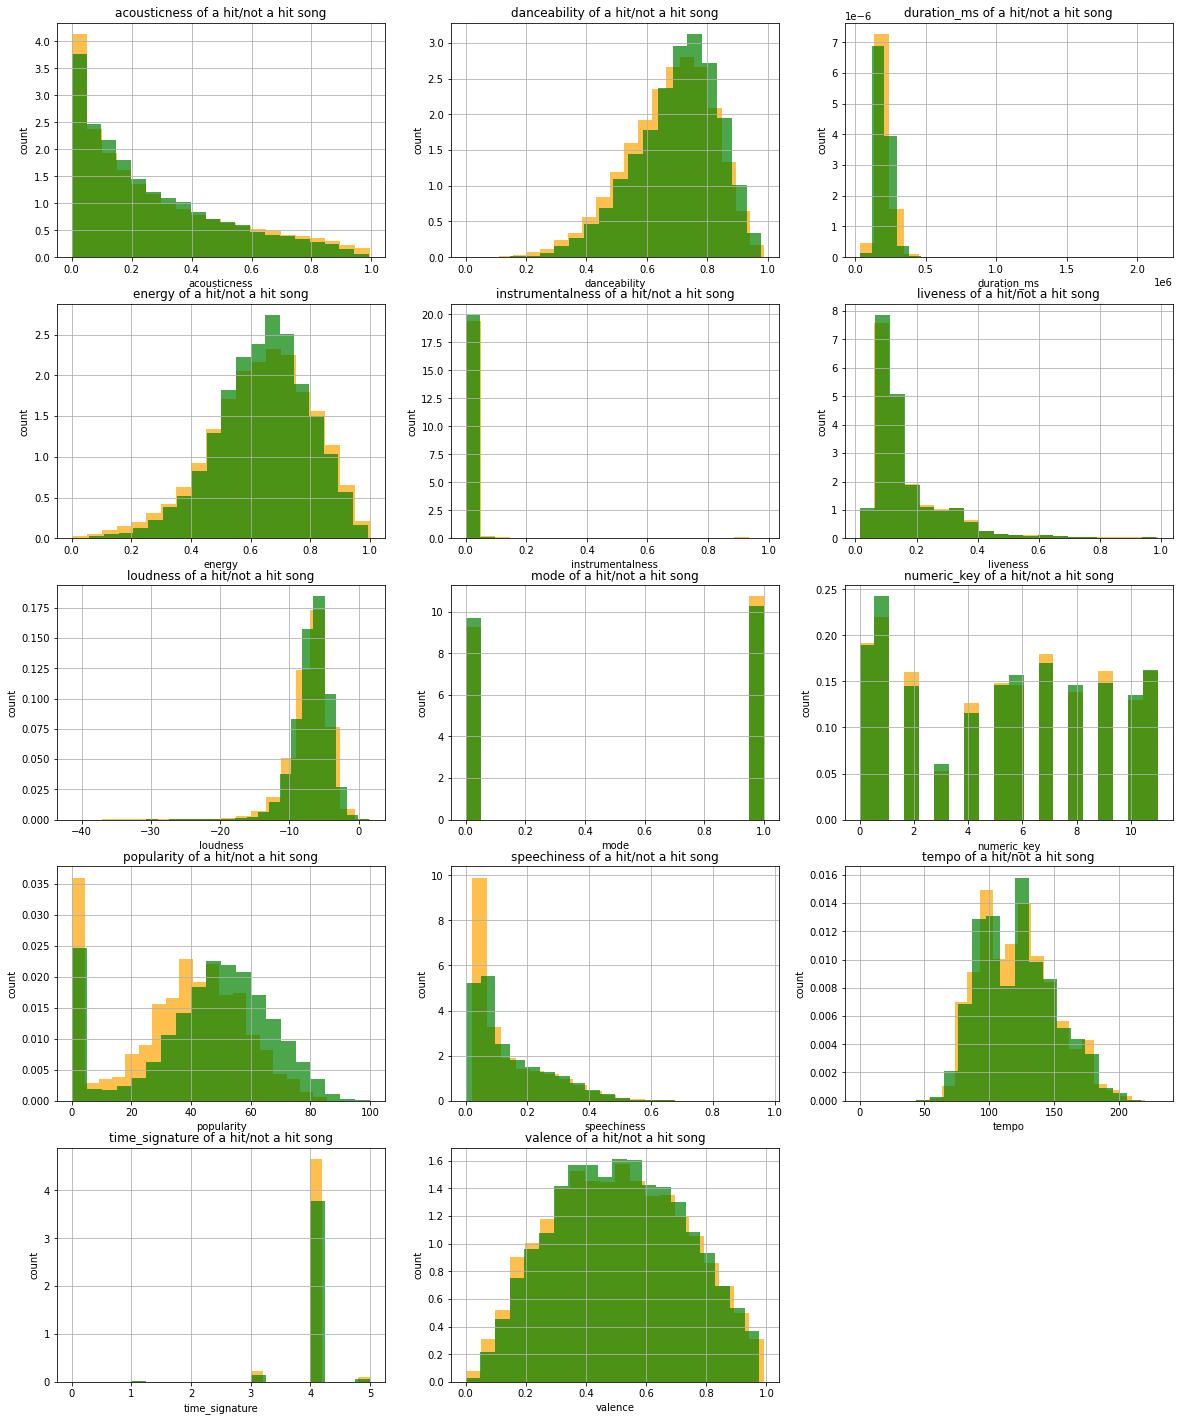

In [13]:
hits_df = prepared_df[prepared_df['target'] == 1]
no_hits_df = prepared_df[prepared_df['target'] == 0]

features = songsData.drop(['id', 'key'], axis=1).columns
fig = plt.figure(figsize=(20, 25))
for index, feature in enumerate(features):
  hits_feature_df = hits_df[feature]
  no_hits_feature_df = no_hits_df[feature]
  a_feature = fig.add_subplot(5,3,index+1)
  a_feature.set_xlabel(feature)
  a_feature.set_ylabel('count')
  a_feature.set_title('{feature} of a hit/not a hit song'.format(feature=feature))
  no_hits_feature_df.hist(alpha=0.7, bins = 20, density=True, color = "orange")
  fig.add_subplot(5,3,index+1)
  hits_feature_df.hist(alpha=0.7, bins = 20, label = 'hit', density=True, color = "green")



### Preprocess

In [14]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop high-cardinality categorical columns
    df = df.drop(['Track Name', 'Artist', 'URL', 'dates', 'id', 'country', 'key', 'Position', 'Streams'], axis=1)
    
    # Split df into X and y
    y = df['target']
    X = df.drop('target', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [15]:
X_train, X_test, y_train, y_test = preprocess_inputs(prepared_df)

### Train models

In [16]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

Logistic Regression trained.
K-Nearest Neighbors trained.
Decision Tree trained.
Support Vector Machine (RBF Kernel) trained.
Random Forest trained.
Gradient Boosting trained.


### Logistic Regression

In [17]:
def show_hotmap():
  cm = confusion_matrix(y_test, models['Logistic Regression'].predict(X_test))

  fig, ax = plt.subplots(figsize=(8, 8))
  ax.imshow(cm)
  ax.grid(False)
  ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
  ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
  ax.set_ylim(1.5, -0.5)
  for i in range(2):
      for j in range(2):
          ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
  plt.show()

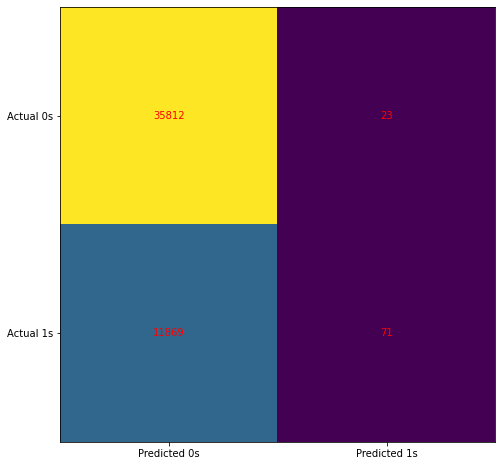

In [18]:
show_hotmap()

#### Decision Tree 

In [19]:
def show_tree(tree, features, path):
  f = io.StringIO()
  export_graphviz(tree,out_file=f, feature_names=features)
  graph_from_dot_data(f.getvalue()).write_png(path)
  img = imread(path)
  plt.figure(figsize=(100, 100))
  plt.imshow(img)

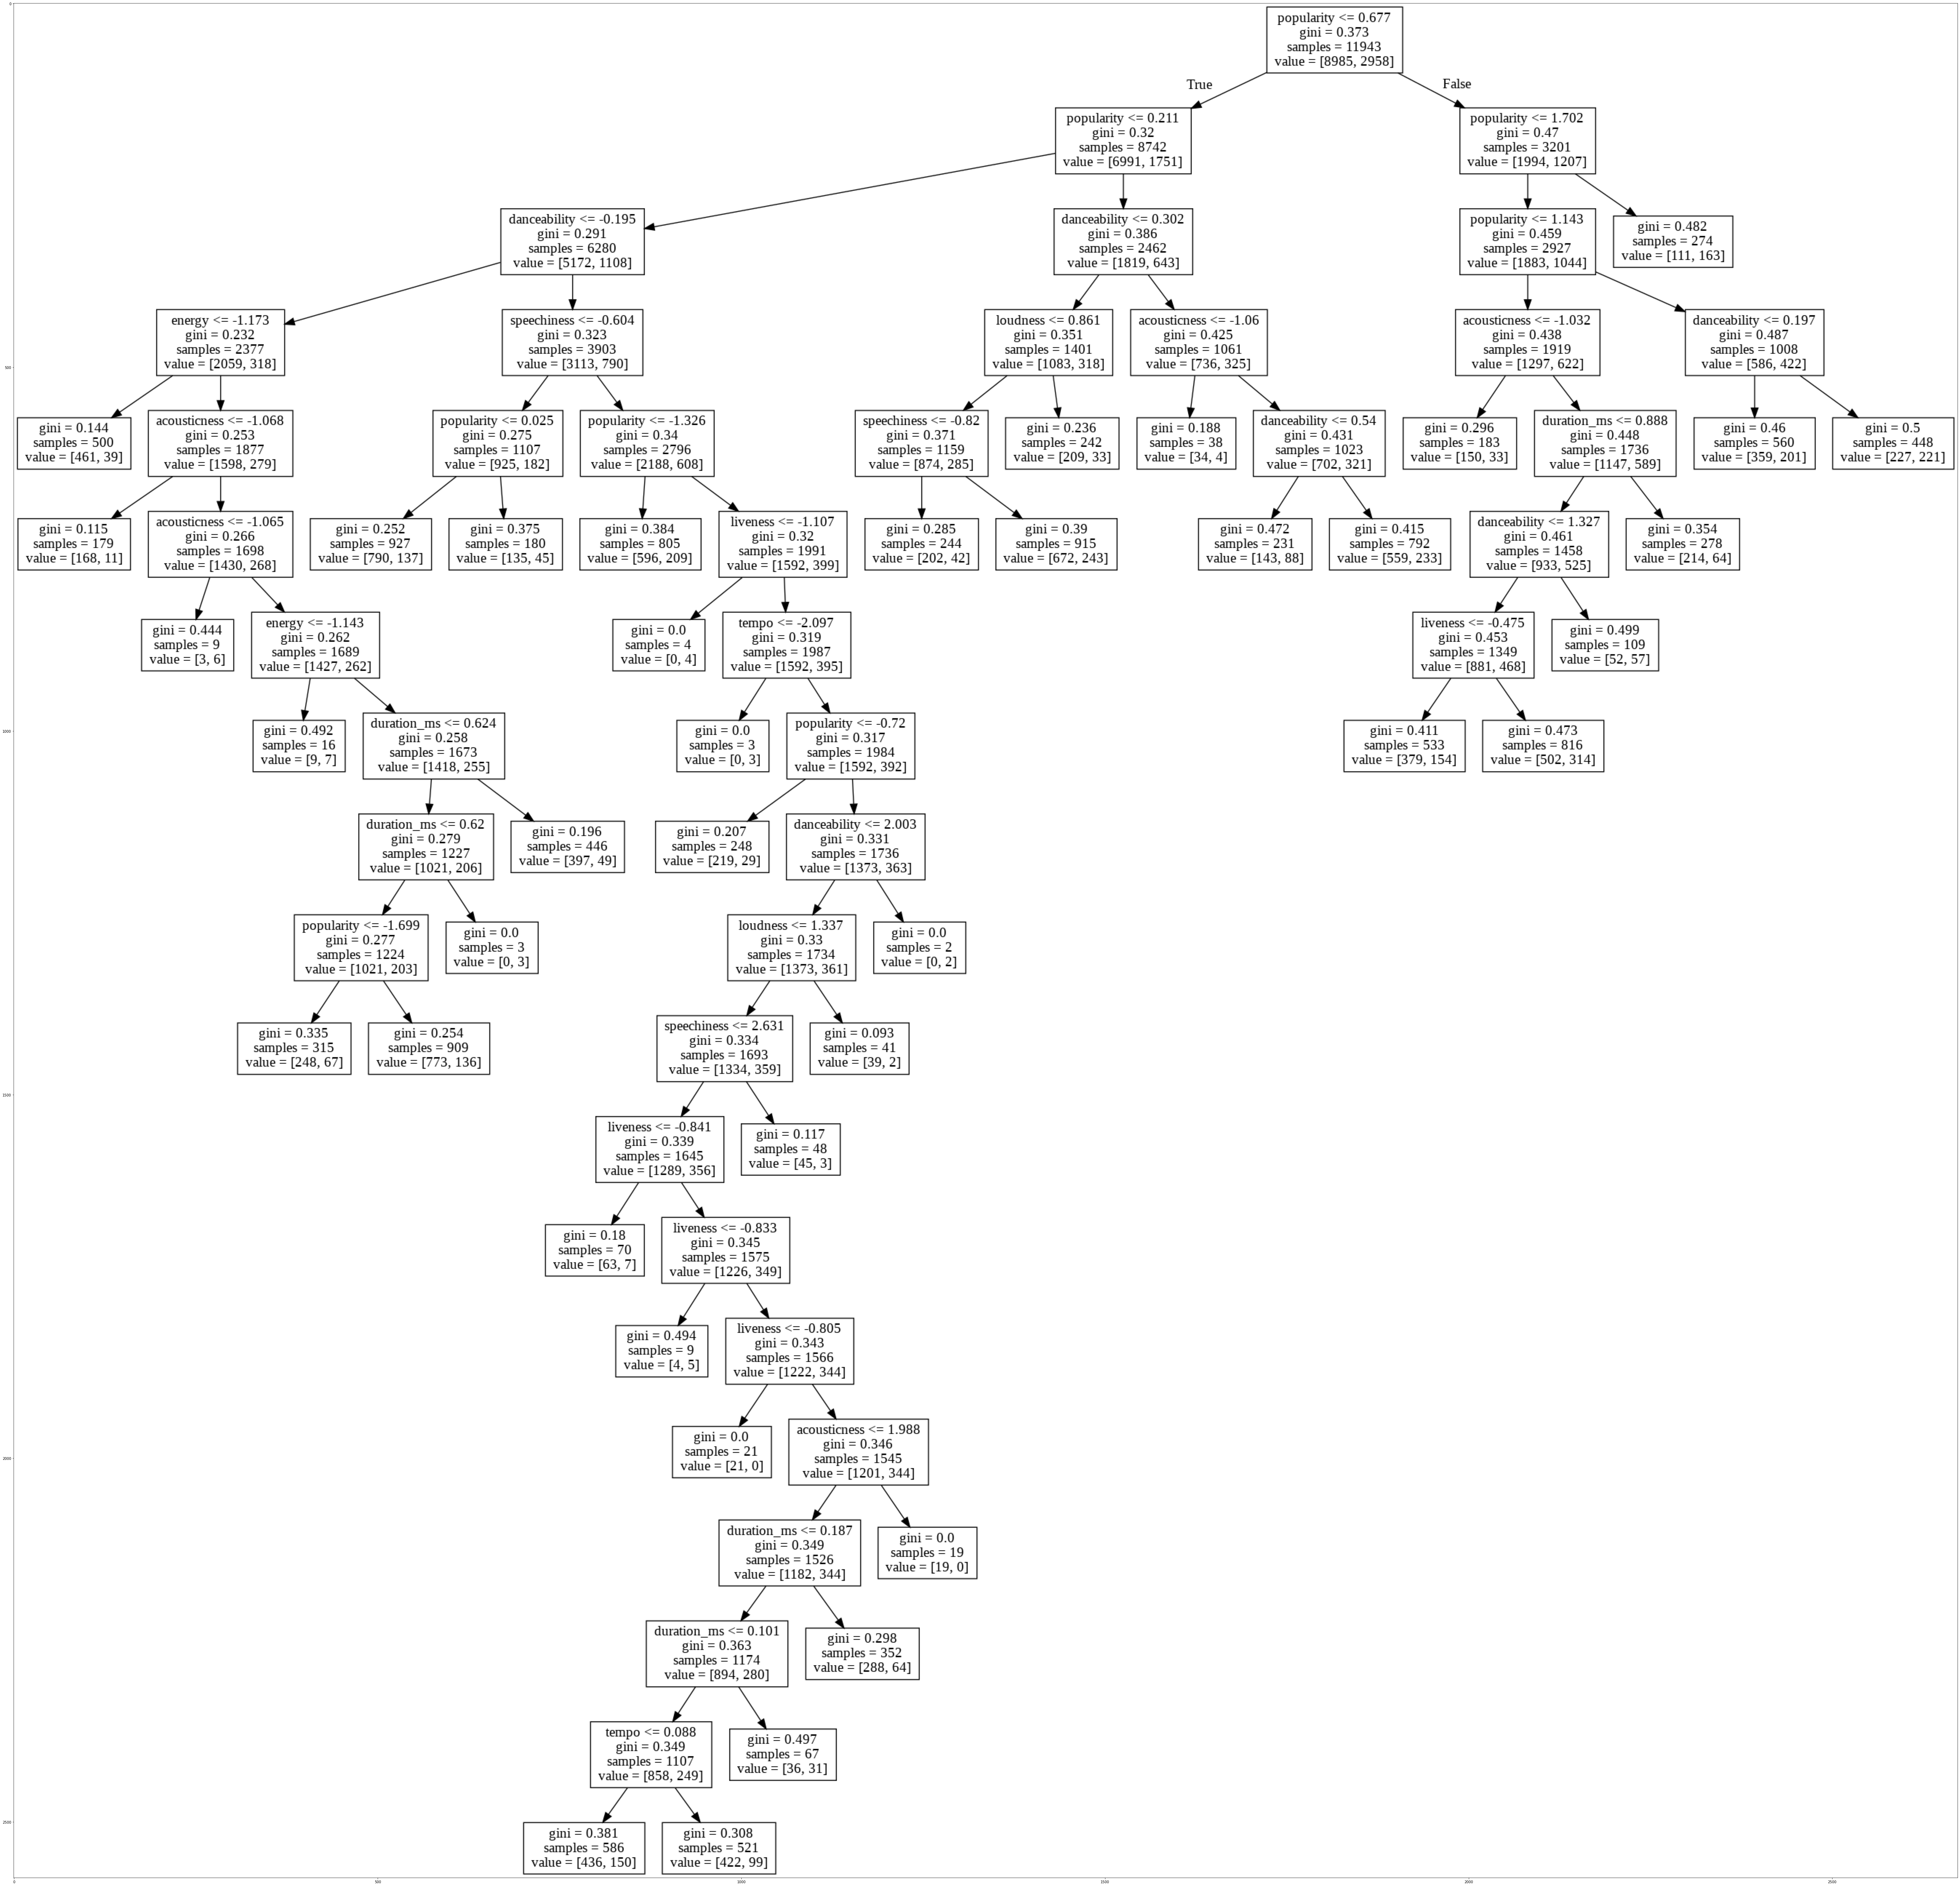

In [20]:
show_tree(models['Decision Tree'].fit(X_train, y_train), features, 'dt.png')

### Get models scores

In [21]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))


Logistic Regression: 75.11%
K-Nearest Neighbors: 71.37%
Decision Tree: 75.04%
Support Vector Machine (RBF Kernel): 75.01%
Random Forest: 75.63%
Gradient Boosting: 75.63%
